# Цель лабораторной работы
Изучить способы предварительной обработки данных для&nbsp;дальнейшего формирования моделей<cite data-cite="ue:lab3"></cite>.

# Задание
Требуется<cite data-cite="ue:lab3"></cite>:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в&nbsp;данных. Для&nbsp;выполнения следующих пунктов можно использовать несколько различных наборов данных.
2. Для&nbsp;выбранного датасета (датасетов) на основе материалов [лекции](https://github.com/ugapanyuk/ml_course/blob/master/common/notebooks/missing/handling_missing_norm.ipynb) решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

# Ход выполнения работы

Подключим все необходимые библиотеки и настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing

# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [43]:
pd.set_option("display.width", 70)

Для&nbsp;выполнения данной лабораторной работы возьмём набор данных по&nbsp; зарплатам в Чикаго<cite data-cite="kg:play"></cite>:

In [44]:
data = pd.read_csv("/home/vladimir/chicago.csv")

Посмотрим на&nbsp;эти наборы данных:

In [45]:
data.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86


In [46]:
data.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary         object
Hourly Rate           object
dtype: object

In [47]:
data.shape

(33183, 8)

## Обработка пропусков в&nbsp;данных

Найдем все пропуски в&nbsp;данных:

In [48]:
data.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Очевидно, что мы будем работать с&nbsp;колонкой `Typical Hours`.

Самый простой вариант — заполнить пропуски нулями:

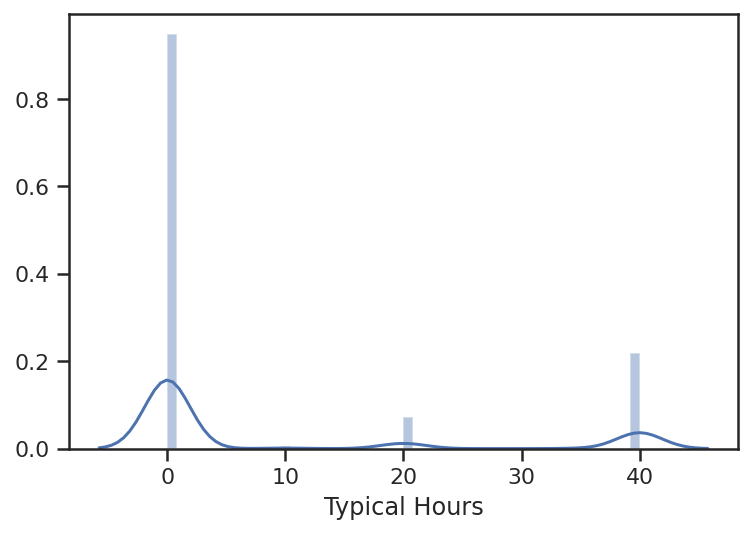

In [49]:
sns.distplot(data["Typical Hours"].fillna(0));

Видно, что в&nbsp;данной ситуации это приводит к&nbsp;выбросам. Логичнее было бы приложениям без&nbsp;часов присваивать среднее кол-во часов:

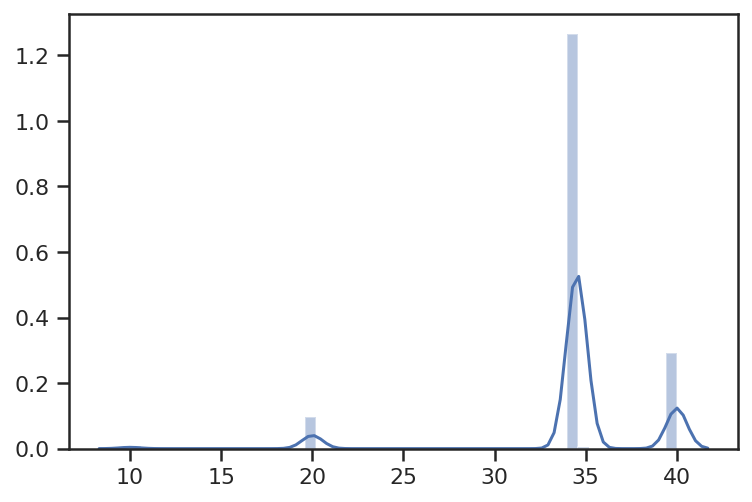

In [50]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["Typical Hours"]])
sns.distplot(mean_rat);

Попробуем также медианное кол-во часови самое частое кол-во часов:

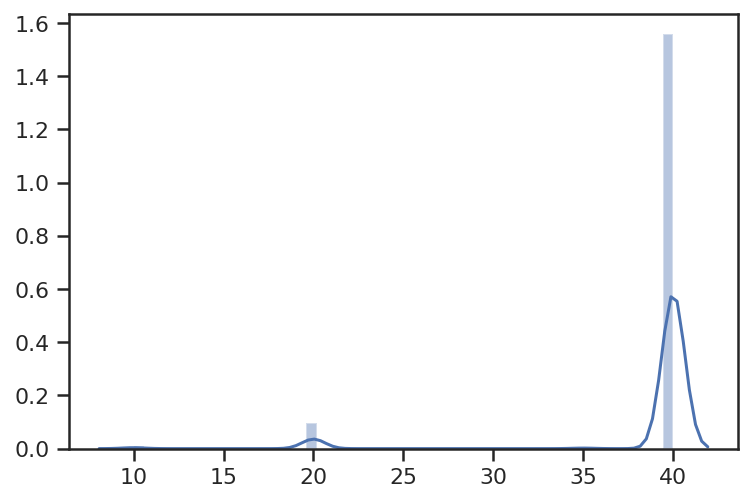

In [51]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["Typical Hours"]])
sns.distplot(med_rat);

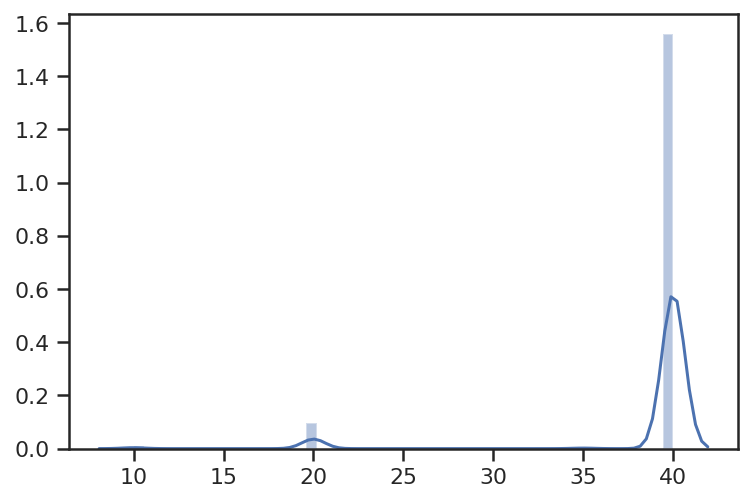

In [52]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["Typical Hours"]])
sns.distplot(freq_rat);

Видно, что получили одинаковые результаты. Остановимся на&nbsp; обычном среднем значении:

In [53]:
data["Typical Hours"] = mean_rat

## Кодирование категориальных признаков

Рассмотрим колонку `Salary or Hourly`:

In [54]:
types = data["Salary or Hourly"].dropna().astype(str)
types.value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

Выполним кодирование категорий целочисленными значениями:

In [55]:
le = sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1]


array(['Hourly', 'Salary'], dtype=object)

Выполним кодирование категорий наборами бинарных значений:

In [56]:
type_oh = pd.get_dummies(types)
type_oh.head()

,Hourly,Salary
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [57]:
type_oh[type_oh["Hourly"] == 1].head()

,Hourly,Salary
4,1,0
6,1,0
7,1,0
10,1,0
18,1,0


## Масштабирование данных

Для&nbsp;начала попробуем обычное MinMax-масштабирование:

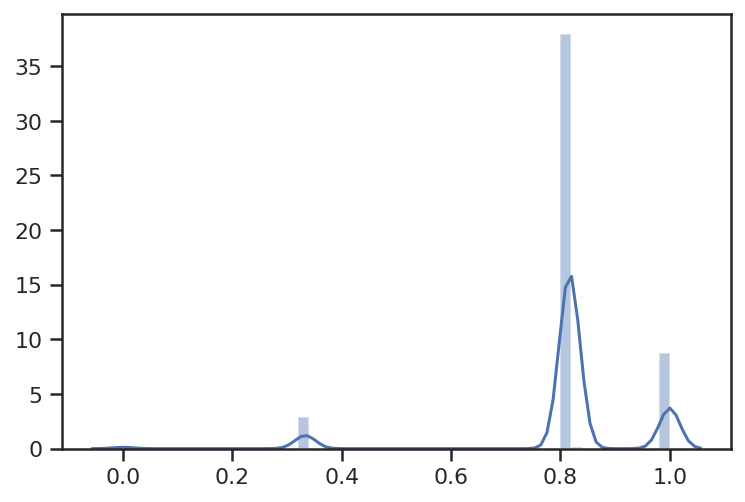

In [58]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Typical Hours"]]));

Результат вполне ожидаемый и вполне приемлемый. Но попробуем и другие варианты, например, масштабирование на&nbsp;основе Z-оценки:

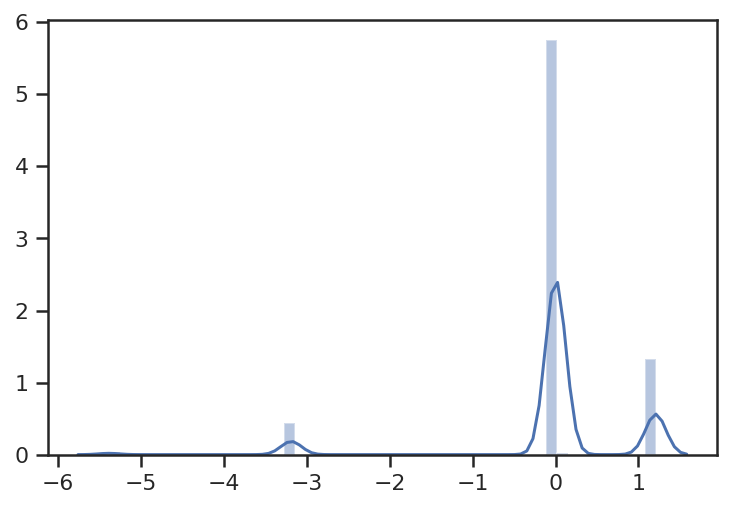

In [59]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["Typical Hours"]]));

Также результат ожидаемый, но его применимость зависит от&nbsp;дальнейшего использования.